## __GK2A level-1b__ (@Yeji Choi)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### __1. Library import__  

__numpy__: 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원  
__netCDF4__: netCDF4 파일을 처리할 수 있도록 지원

In [2]:
!pip install cartopy
!pip install netCDF4

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
from scipy.stats import mode
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import numpy as np
from skimage.transform import resize

In [4]:
nc_path='/content/drive/MyDrive/Colab Notebooks/data_gk2a/'

#적외채널 영상 다루기


In [9]:
nc_fname='gk2a_ami_le1b_ir105_ea020lc_202104010000.nc'

nc=Dataset(nc_path+nc_fname,'r', format='netcdf4')

In [10]:
print(nc)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    projection_type: lambert_conformal_conic
    standard_parallel1: 30.0
    standard_parallel2: 60.0
    origin_latitude: 38.0
    central_meridian: 126.0
    false_easting: 0.0
    false_northing: 0.0
    image_width: 3000
    image_height: 2600
    pixel_size: 2000.0
    upper_left_easting: -2999000.0
    upper_left_northing: 2599000.0
    upper_right_easting: 2999000.0
    upper_right_northing: 2599000.0
    lower_left_easting: -2999000.0
    lower_left_northing: -2599000.0
    lower_right_easting: 2999000.0
    lower_right_northing: -2599000.0
    _CoordinateTransformType: 0.0
    _CoordinateAxisTypes: 0.0
    file_name: gk2a_ami_le1b_ir105_ea020lc_202104010000.nc
    origianl_sourece_file: gk2a_ami_le1b_ir105_fd020ge_202104010000.nc
    number_of_columns: 3000
    number_of_lines: 2600
    total_pixel_data_size: 7800000
    channel_center_wavelength: 10.5
    channel_spatial_resolution: 2.0
    data_pro

In [11]:
ncdata=nc['image_pixel_values'] #data=nc.variables['image_pixel_values']와 같음
ncdata

<class 'netCDF4.Variable'>
uint16 image_pixel_values(dim_y, dim_x)
    number_of_total_pixels: 7800000
    average_pixel_value: 11278.503699636363
    channel_name: IR105
    max_pixel_value: 32768
    min_pixel_value: 2158
    number_of_total_bits_per_pixel: 16
    number_of_valid_bits_per_pixel: 13
unlimited dimensions: 
current shape = (2600, 3000)
filling on, default _FillValue of 65535 used

In [12]:
data=nc.variables['image_pixel_values'][:,:]
data

masked_array(
  data=[[5933, 5926, 5938, ..., 6160, 6504, 6697],
        [5934, 5926, 5938, ..., 6346, 6504, 6835],
        [5934, 5933, 5938, ..., 6346, 6792, 6835],
        ...,
        [4809, 4667, 4617, ..., 3228, 3231, 3231],
        [4541, 4667, 4772, ..., 3228, 3231, 3233],
        [4458, 4541, 4737, ..., 3225, 3231, 3234]],
  mask=False,
  fill_value=np.int64(999999),
  dtype=uint16)

In [13]:
data.shape

(2600, 3000)

In [16]:
np.min(data), np.max(data)

(np.uint16(2813), np.uint16(7630))

In [17]:
data_1d=data.flatten()
data_1d.shape

(7800000,)

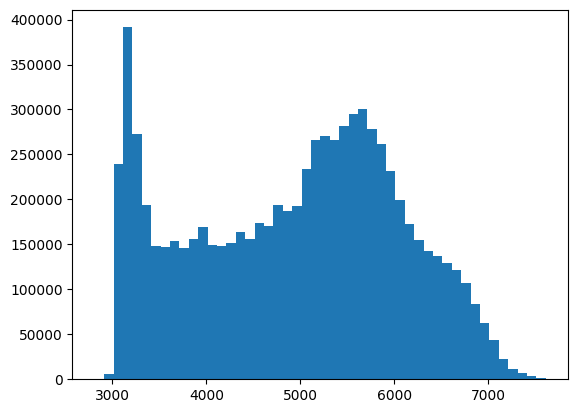

In [18]:
plt.hist(data_1d, bins=range(np.min(data),np.max(data), 100))
plt.show()

In [25]:
CT_path=nc_path+'/ct_table/'
AL_postfix='_con_alb.txt'
BT_postfix='_con_bt.txt'

channel=ncdata.getncattr('channel_name')
print(channel)

conversion_table=np.loadtxt(CT_path+channel+BT_postfix,'float64')

IR105


In [26]:
data_converted=conversion_table[ipixel_process_masked]
data_converted.shape, np.min(data_converted), np.max(data_converted)

((2600, 3000), np.float64(200.110592), np.float64(300.241644))

In [ ]:
#### __2D 이미지로 쓱 확인하기__

_*Histogram그릴때 사용했던 matplotlib을 그대로 사용_

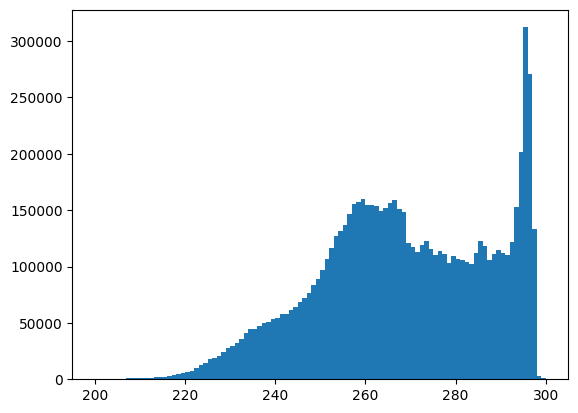

In [27]:
plt.hist(data_converted.flatten(), bins=range(200, 301, 1))
plt.show()

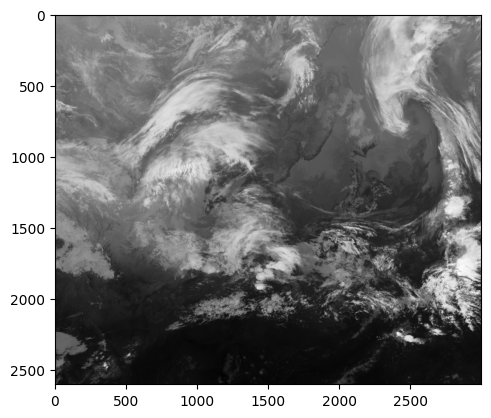

In [28]:
plt.imshow(data_converted, cmap='Greys')
plt.show()

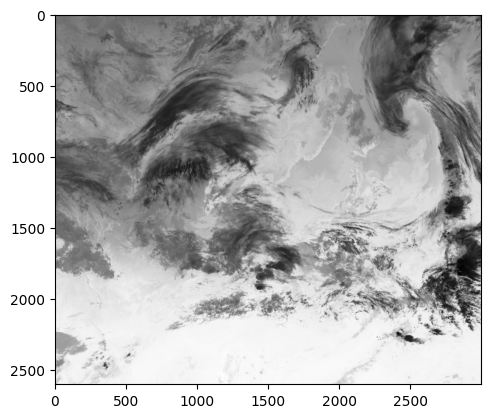

In [29]:
plt.imshow(data, cmap='Greys')
plt.show()

In [ ]:
plt.imshow(data_converted, cmap='Greys')
plt.show()

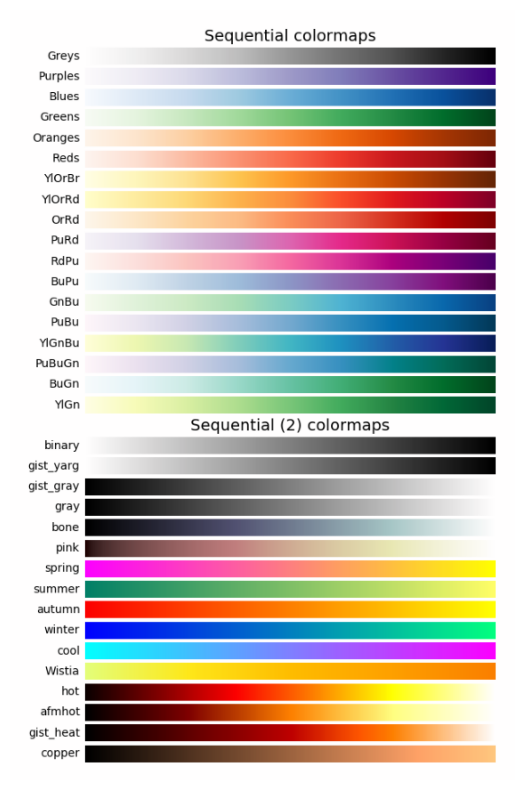

In [32]:
fig = plt.figure(figsize=(15,10))
im = Image.open(nc_path+"cmap2.png")
plt.imshow(im)
plt.axis("off")
plt.show()

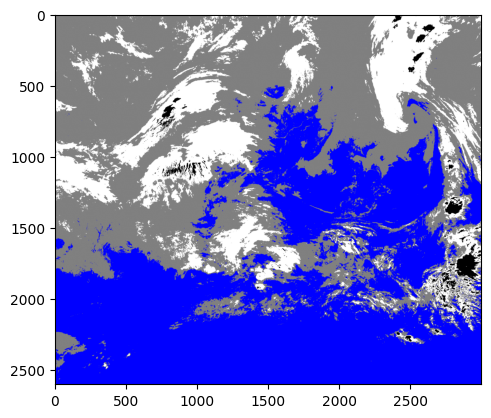

In [33]:
from matplotlib.colors import ListedColormap
cmap1 =ListedColormap(["black","white","grey","blue"], name='from_list', N=None)
plt.imshow(data_converted, cmap=cmap1)
plt.show()

### __5. Data statistics__   
- 통계분석을 위한 Library install  

In [34]:
np.min(data_converted), np.max(data_converted), np.mean(data_converted), np.median(data_converted)

(np.float64(200.110592),
 np.float64(300.241644),
 np.float64(268.6703939600245),
 np.float64(268.194457))

In [35]:
np.min(data), np.max(data), np.mean(data), np.median(data)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


(np.uint16(2813),
 np.uint16(7630),
 np.float64(4936.771160641026),
 np.float64(5094.0))

In [36]:
np.var(data), np.std(data)

(np.float64(1244248.2075085742), np.float64(1115.4587430777412))

In [37]:
np.quantile(data, .25), np.quantile(data, .75)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


(np.float64(3967.0), np.float64(5792.0))

In [38]:
mode(data)

ModeResult(mode=array([5854, 5070, 5070, ..., 3221, 3216, 3194]), count=array([10, 12,  8, ..., 12, 10, 11]))

plot for presentation and paper__   
- 지도위에 그림을 그리기 위한 Library install  

In [42]:
nc_path

'/content/drive/MyDrive/Colab Notebooks/data_gk2a/'

In [48]:
geo_name='gk2a_latlon_ea_2000.bin'

with open(nc_path+geo_name,'rb') as f:
    nx, ny =  3000, 2600
    latlon = np.fromfile(f, dtype='float', count=nx*ny*2)

print(latlon.shape)

(15600000,)


In [50]:
latlon=np.reshape(latlon, (ny,nx,2))
lat_arr=latlon[:,:,0]
lon_arr=latlon[:,:,1]

np.min(lat_arr[:,0]), np.min(lat_arr[:,1]), np.max(lat_arr), np.min(lon_arr), np.max(lon_arr)

(np.float64(11.30853),
 np.float64(11.31335),
 np.float64(61.93105),
 np.float64(76.81183),
 np.float64(175.18817))

- 지도위에 데이터 그리기

(2600, 3000) <class 'numpy.ndarray'>


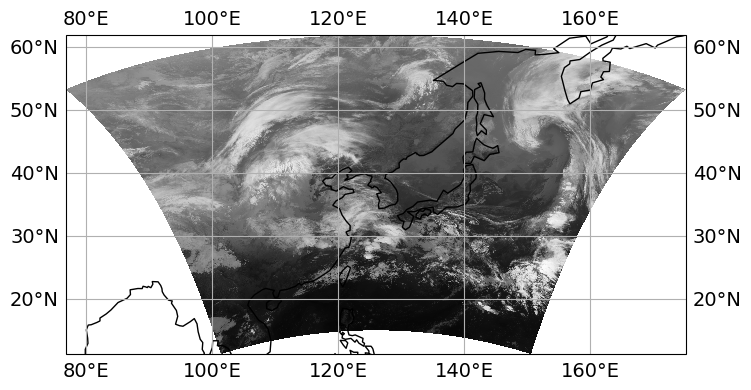

In [55]:
crs=ccrs.PlateCarree(central_longitude=-120,globe=None)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), #constrained_layout=True,
                          subplot_kw={'projection': crs})

print(lon_arr.shape, type(lon_arr))
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='Greys', transform=ccrs.PlateCarree())
ax.coastlines()


gl=ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
plt.show()

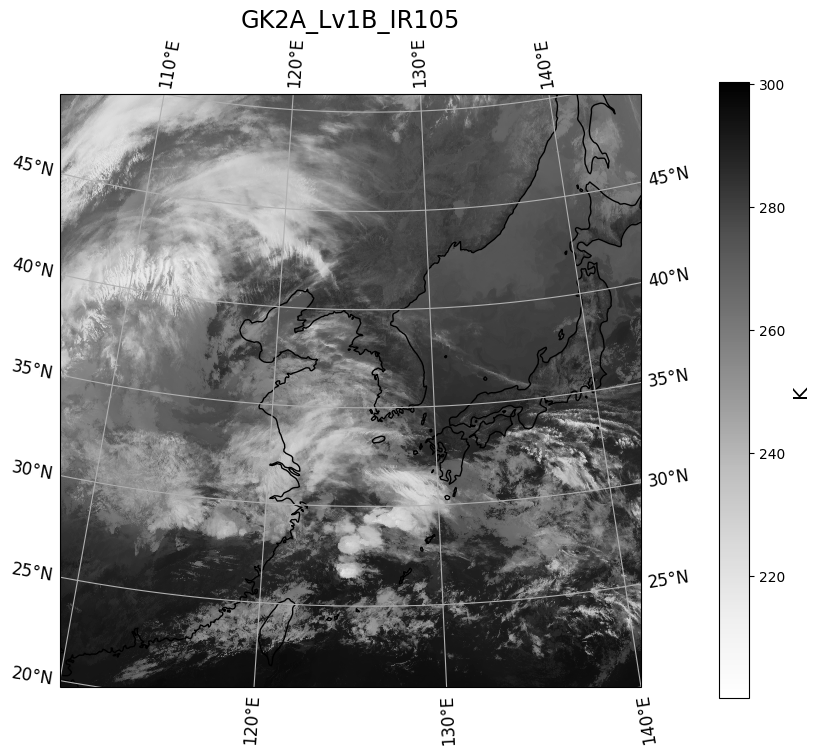

In [57]:
fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap='Greys', transform=ccrs.PlateCarree())
ax.coastlines()

ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
plt.show()

<ipython-input-60-5d67ef9ec59f>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  top = cm.get_cmap('Oranges_r', 128)
<ipython-input-60-5d67ef9ec59f>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bottom = cm.get_cmap('Blues', 128)


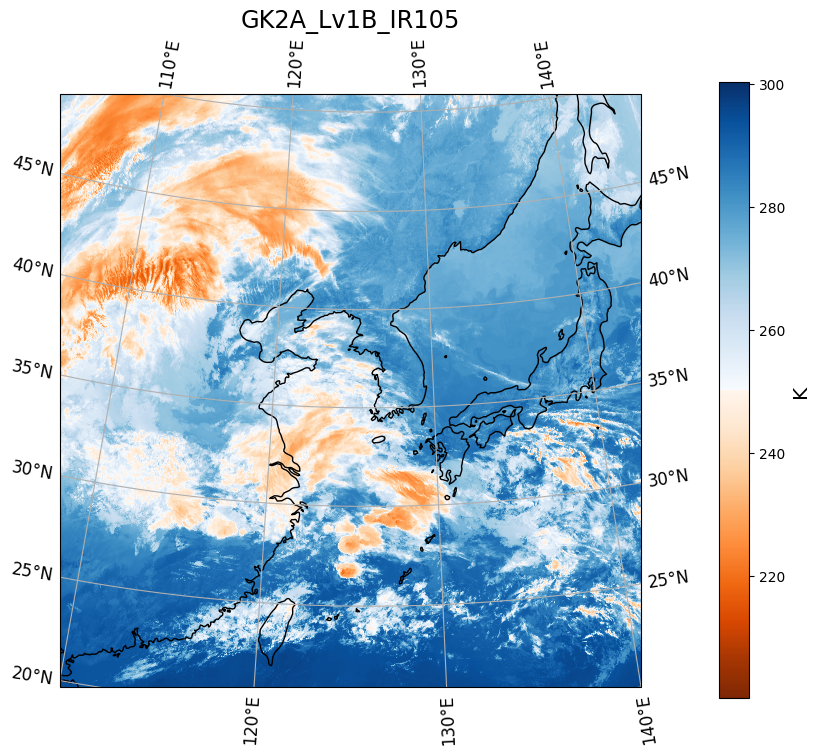

In [60]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')


fig = plt.figure(figsize=(10,10))

p = ccrs.LambertConformal(central_longitude=126, central_latitude=38.0,globe=None)
ax = plt.axes(projection=p)
cf1 = ax.pcolormesh(lon_arr, lat_arr, data_converted, cmap=newcmp, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([110,140,20,50])
ax.set_title("GK2A_Lv1B_"+channel, size='xx-large')

cbar = plt.colorbar(cf1, orientation="vertical", pad=0.1,shrink=0.8)
cbar.set_label('K', size='x-large')

gl=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

plt.savefig('gk2a_vl1b_ir105.png',dpi=300,pad_inches=0.1)

# 가시채널 영상 다루기

In [5]:
def ncread_convert(nc_path,nc_fname):
    nc=Dataset(nc_path+nc_fname,'r', format='netcdf4')
    ncdata=nc['image_pixel_values']
    channel=ncdata.getncattr('channel_name')

    data=nc.variables['image_pixel_values'][:,:]
    print(data.shape)

    if ((channel == 'VI004') or (channel == 'NR016')
        or (channel == 'VI005')):
        mask = 0b0000011111111111 #11bit mask
    elif ((channel == 'VI006')
        or (channel == 'NR013') or (channel == 'WV063')):
        mask = 0b0000111111111111 #12bit mask
    elif (channel == 'SW038'):
        mask = 0b0011111111111111 #14bit mask
    else:
        mask = 0b0001111111111111 #13bit mask

    ipixel_process_masked=np.bitwise_and(data,mask)

    CT_path=nc_path+'ct_table/'
    AL_postfix='_con_alb.txt'
    BT_postfix='_con_bt.txt'
    if (channel[0:2] == 'VI') or (channel[0:2] == 'NR'):
        conversion_table=np.loadtxt(
        CT_path+channel+AL_postfix,'float64')
    else:
        conversion_table=np.loadtxt(
        CT_path+channel+BT_postfix,'float64')

    data_converted=conversion_table[ipixel_process_masked]
    print(data_converted.shape, np.min(data_converted), np.max(data_converted))

    return(data_converted)

In [6]:
nc_vi004='gk2a_ami_le1b_vi004_ko010lc_202504030520.nc'
nc_vi005='gk2a_ami_le1b_vi005_ko010lc_202504030520.nc'
nc_vi006='gk2a_ami_le1b_vi006_ko005lc_202504030520.nc'

nc_vi4=ncread_convert(nc_path,nc_vi004)
nc_vi5=ncread_convert(nc_path,nc_vi005)
nc_vi6=ncread_convert(nc_path,nc_vi006)

(1800, 1800)
(1800, 1800) 0.094037928 0.76759862
(1800, 1800)
(1800, 1800) 0.072425 0.788687
(3600, 3600)
(3600, 3600) 0.027119694 0.940248258


In [7]:
image=nc_vi6
image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
                       anti_aliasing=True)

In [8]:
np.min(nc_vi6), np.max(nc_vi6), np.min(image_resized), np.max(image_resized)

(np.float64(0.027119694),
 np.float64(0.940248258),
 np.float64(0.03394486601545259),
 np.float64(0.8657189747457229))

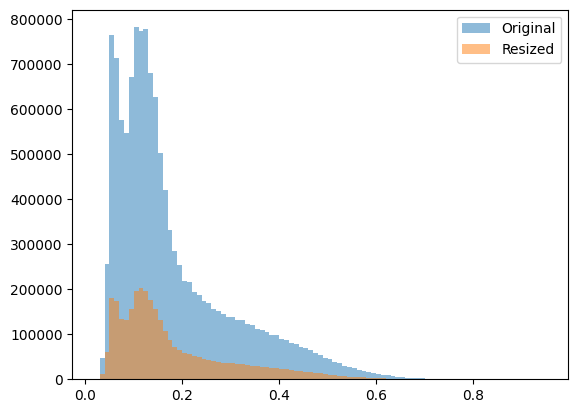

In [9]:
def find_bins(observations, width):
    minimmum = np.min(observations)
    maximmum = np.max(observations)
    bound_min = -1.0 * (minimmum % width - minimmum)
    bound_max = maximmum - maximmum % width + width
    n = int((bound_max - bound_min) / width) + 1
    bins = np.linspace(bound_min, bound_max, n)
    return bins

data_1d=nc_vi6.flatten()
data_re_1d=image_resized.flatten()
plt.hist(data_1d, bins=find_bins(data_1d, 0.01), alpha=0.5, label='Original')
plt.hist(data_re_1d, bins=find_bins(data_re_1d, 0.01), alpha=0.5, label='Resized')
plt.legend()

Text(0.5, 1.0, 'Resezed Image')

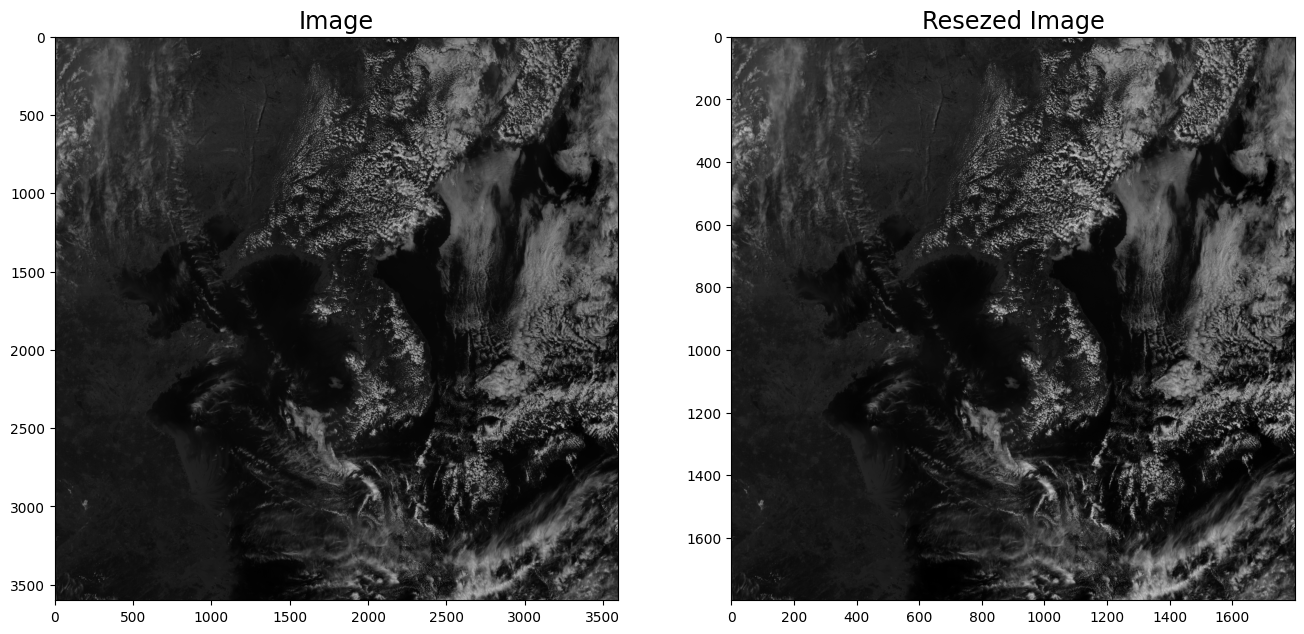

In [10]:
fig=plt.figure(figsize=(16,8))
rows=1
cols=2

ax1=fig.add_subplot(rows, cols, 1)
ax1.imshow(image, cmap='gray')
ax1.set_title("Image",size='xx-large')

ax2=fig.add_subplot(rows, cols, 2)
ax2.imshow(image_resized, cmap='gray')
ax2.set_title("Resezed Image", size='xx-large')


In [11]:
R=image_resized
G=nc_vi5
B=nc_vi4

R = np.clip(R, 0, 1)
G = np.clip(G, 0, 1)
B = np.clip(B, 0, 1)

gamma = 2.2
R = np.power(R, 1/gamma)
G = np.power(G, 1/gamma)
B = np.power(B, 1/gamma)

(np.float64(-0.5), np.float64(1799.5), np.float64(1799.5), np.float64(-0.5))

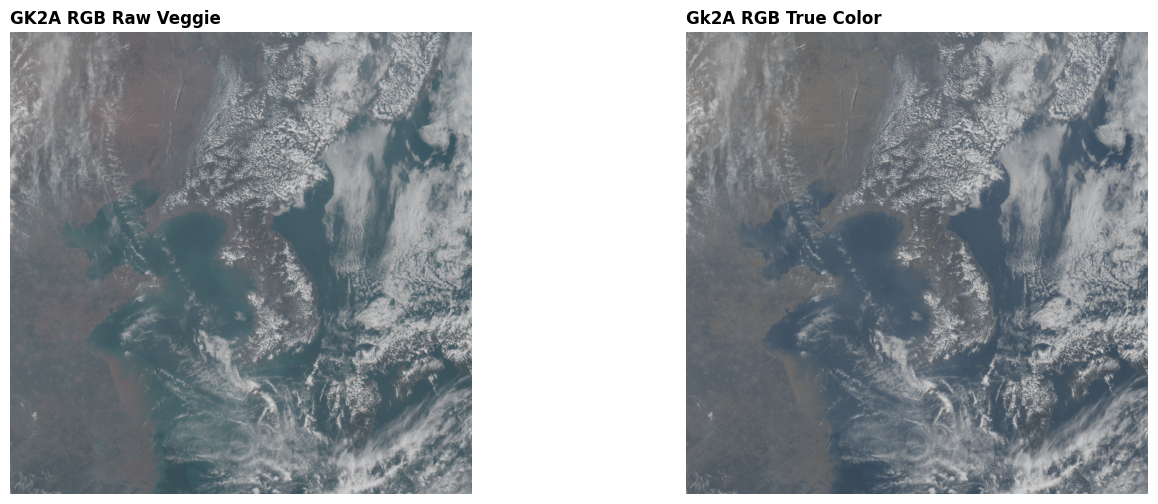

In [12]:
G_true = 0.45 * R + 0.1 * G + 0.45 * B
G_true = np.clip(G_true, 0, 1)

RGB_veggie = np.dstack([R, G, B])

# The RGB array for the true color image
RGB = np.dstack([R, G_true, B])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The RGB using the raw veggie band
ax1.imshow(RGB_veggie)
ax1.set_title('GK2A RGB Raw Veggie', fontweight='bold', loc='left',
              fontsize=12)
ax1.axis('off')

# The RGB for the true color image
ax2.imshow(RGB)
ax2.set_title('Gk2A RGB True Color', fontweight='bold', loc='left',
              fontsize=12)
ax2.axis('off')